<a href="https://colab.research.google.com/github/LauraHu820/5241_Machine_Learning/blob/main/5241_unsupervised_learning_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

Preprocessing data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import SpectralBiclustering
import umap
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import NMF

In [ ]:
authors_full = pd.read_csv('authors.csv')
authors = authors_full.drop(columns=['Unnamed: 0','BookID'] )
X = StandardScaler().fit_transform(authors)

In [ ]:
authors_full.head()

,Unnamed: 0,a,all,also,an,and,any,are,as,at,...,were,what,when,which,who,will,with,would,your,BookID
0,Austen,46,12,0,3,66,9,4,16,13,...,11,7,5,6,8,4,9,1,0,1
1,Austen,35,10,0,7,44,4,3,18,16,...,13,5,7,7,3,5,14,8,0,1
2,Austen,46,2,0,3,40,1,13,11,9,...,6,10,4,6,4,5,15,3,9,1
3,Austen,40,7,0,4,64,3,3,20,13,...,10,3,6,10,5,3,22,4,3,1
4,Austen,29,5,0,6,52,5,14,17,6,...,5,8,4,13,2,4,21,10,0,1


Part 1: task 1: Visualization of observation

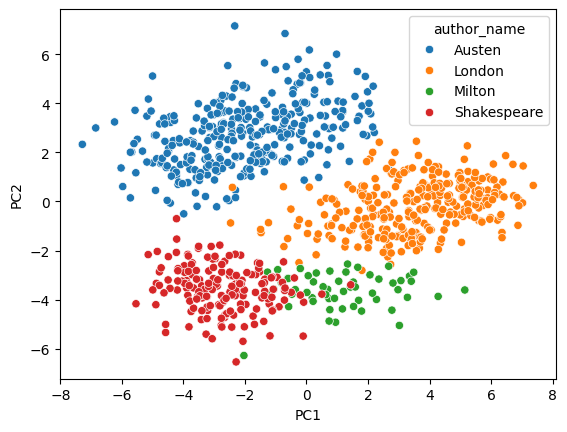

In [ ]:
# PCA
pca_obs = PCA()
pca_result_obs = pca_obs.fit_transform(X)

pc_df_obs = pd.DataFrame(pca_result_obs[:, :2], columns=[f'PC{i+1}' for i in range(2)])
pc_df_obs['author_name'] = authors_full['Unnamed: 0']
sns.scatterplot(data=pc_df_obs, x='PC1', y='PC2', hue = 'author_name', palette='tab10')
plt.show()

In [ ]:
# MDS
mds_obs = MDS(n_components=2)
mds_result_obs = mds_obs.fit_transform(X)


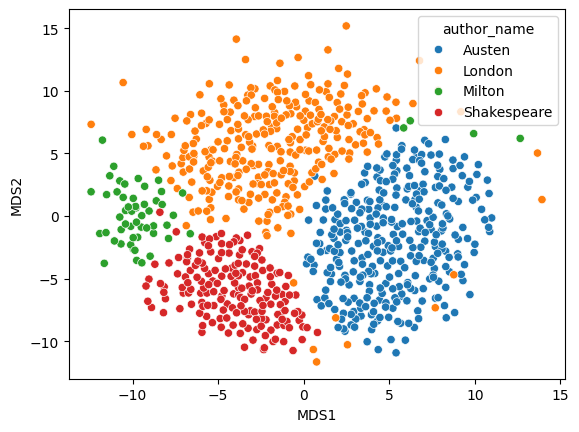

In [ ]:
mds_df_obs = pd.DataFrame(mds_result_obs[:, :2], columns=[f'MDS{i+1}' for i in range(2)])
mds_df_obs['author_name'] = authors_full['Unnamed: 0']
sns.scatterplot(data=mds_df_obs, x='MDS1', y='MDS2', hue = 'author_name', palette='tab10')
plt.show()

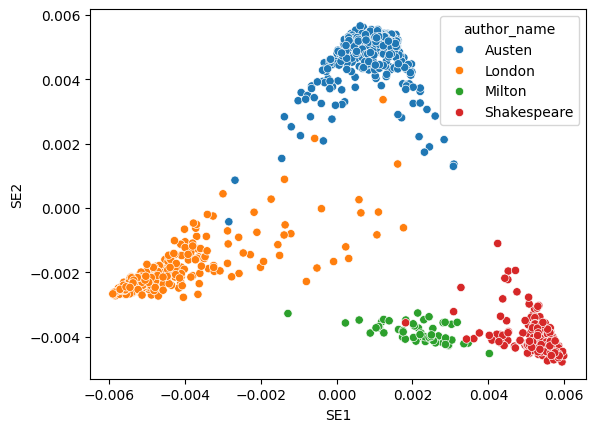

In [ ]:
# spectral embedding
se_obs = SpectralEmbedding(n_components=2)
se_result_obs = se_obs.fit_transform(X)

se_df_obs = pd.DataFrame(se_result_obs[:, :2], columns=[f'SE{i+1}' for i in range(2)])
se_df_obs['author_name'] = authors_full['Unnamed: 0']
sns.scatterplot(data=se_df_obs, x='SE1', y='SE2', hue = 'author_name', palette='tab10')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


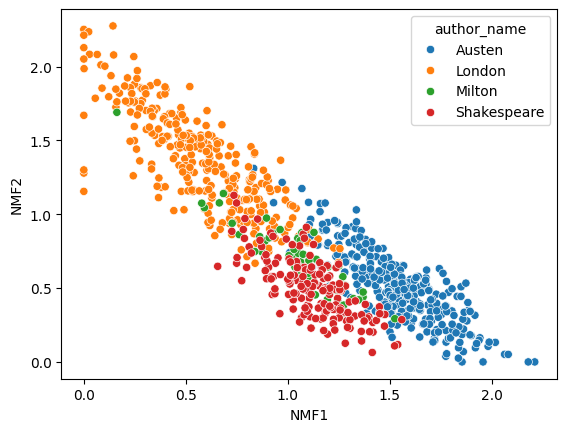

In [ ]:
# NMF
nmf_obs = NMF(n_components=2)
# for NMF, we cannot have negative value, so we use the original data without standardization
nmf_result_obs = nmf_obs.fit_transform(authors)

nmf_df_obs = pd.DataFrame(nmf_result_obs[:, :2], columns=[f'NMF{i+1}' for i in range(2)])
nmf_df_obs['author_name'] = authors_full['Unnamed: 0']
sns.scatterplot(data=nmf_df_obs, x='NMF1', y='NMF2', hue = 'author_name', palette='tab10')
plt.show()

In [ ]:
# UMAP
umap_obs = umap.UMAP(metric="euclidean", random_state=0)
umap_result_obs = umap_obs.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
authors_labels = authors_full['Unnamed: 0']

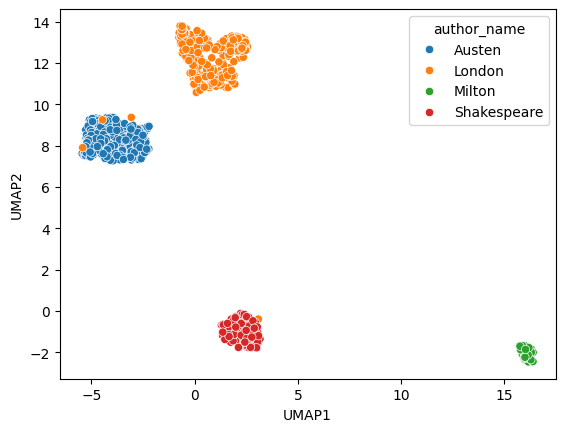

In [ ]:
umap_df_obs = pd.DataFrame(umap_result_obs[:, :2], columns=[f'UMAP{i+1}' for i in range(2)])
umap_df_obs['author_name'] = authors_labels
sns.scatterplot(data=umap_df_obs, x='UMAP1', y='UMAP2', hue = 'author_name', palette='tab10')
plt.show()

Task 2: features visualization

<ipython-input-59-9a214dcc963f>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=pc_df_features, x='PC1', y='PC2', palette='tab10')


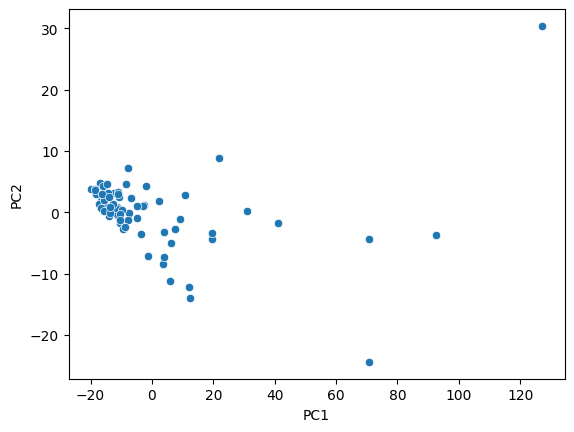

In [ ]:
X_T = StandardScaler().fit_transform(authors.T)

# PCA
pca_features = PCA()
pca_result_features = pca_features.fit_transform(X_T)

pc_df_features = pd.DataFrame(pca_result_features[:, :2], columns=[f'PC{i+1}' for i in range(2)])
sns.scatterplot(data=pc_df_features, x='PC1', y='PC2', palette='tab10')
plt.show()

<ipython-input-56-4c737358e9d0>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=mds_df_features, x='MDS1', y='MDS2',palette='tab10')


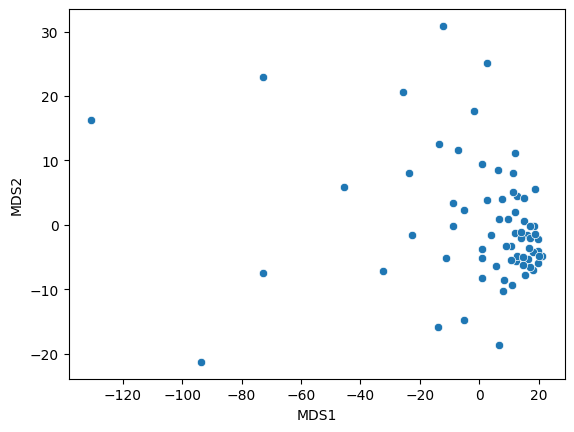

In [ ]:
# DMS
mds_features = MDS(n_components=2, metric=True)
mds_result_features = mds_features.fit_transform(X_T)

mds_df_features = pd.DataFrame(mds_result_features[:, :2], columns=[f'MDS{i+1}' for i in range(2)])
sns.scatterplot(data=mds_df_features, x='MDS1', y='MDS2',palette='tab10')
plt.show()

<ipython-input-57-63650bdb3c9e>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=se_df_features, x='SE1', y='SE2',palette='tab10')


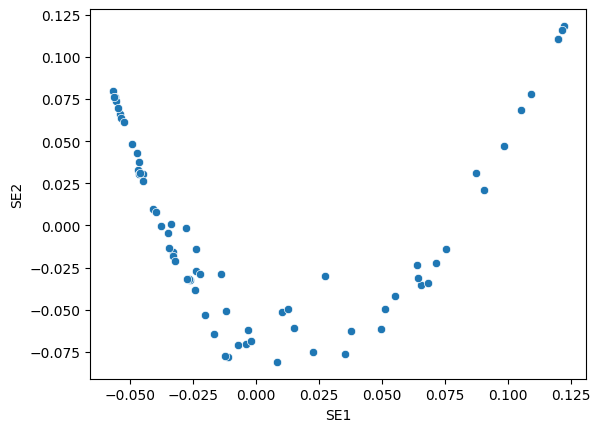

In [ ]:
# Spectral embedding
se_features = SpectralEmbedding(n_components=2)
se_result_features = se_features.fit_transform(X_T)

se_df_features = pd.DataFrame(se_result_features[:,:2], columns=[f'SE{i+1}' for i in range(2)])
sns.scatterplot(data=se_df_features, x='SE1', y='SE2',palette='tab10')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-58-5d59f6225bec>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=umap_df_features, x='UMAP1', y='UMAP2',palette='tab10')


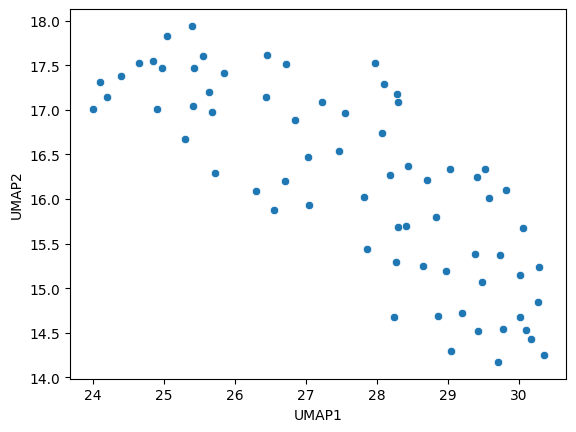

In [ ]:
# UMAP
umap_features = umap.UMAP(metric="euclidean", random_state=0)
umap_result_features = umap_features.fit_transform(X_T)

umap_df_features = pd.DataFrame(umap_result_features[:, :2], columns=[f'UMAP{i+1}' for i in range(2)])
sns.scatterplot(data=umap_df_features, x='UMAP1', y='UMAP2',palette='tab10')
plt.show()


Task 3: biclustering

In [ ]:
bicluster = SpectralBiclustering(n_clusters=4, random_state=0)
bicluster_result = bicluster.fit(X)


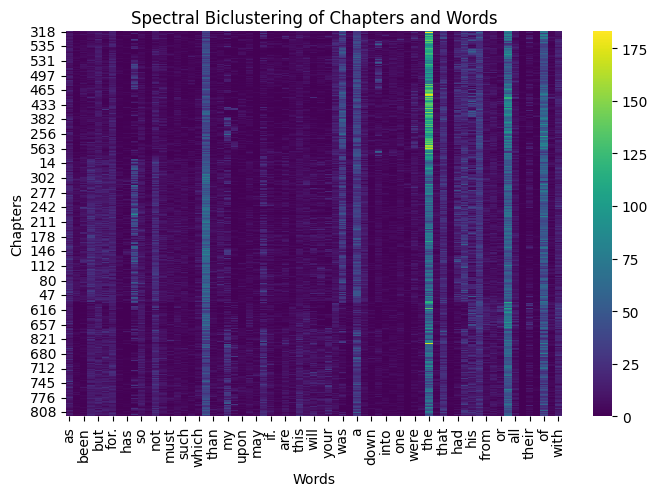

In [ ]:
df_biclustered = authors.iloc[np.argsort(bicluster_result.row_labels_)]
df_biclustered = df_biclustered.iloc[:, np.argsort(bicluster_result.column_labels_)]

plt.figure(figsize=(8, 5))
sns.heatmap(df_biclustered, cmap='viridis')
plt.title("Spectral Biclustering of Chapters and Words")
plt.xlabel("Words")
plt.ylabel("Chapters")
plt.show()

Part (b) Clustering

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# dimention reduction
pca = PCA(n_components=10)
X_reduction = pca.fit_transform(X)

In [ ]:
# K-Means clustering
kmeans = KMeans(n_clusters=4, init='random', n_init=1, max_iter=30, random_state=42)
kmeans_result = kmeans.fit_predict(X_reduction)

# hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical_result = hierarchical.fit_predict(X_reduction)

# GMM
gmm = GaussianMixture(n_components=4, covariance_type='spherical', init_params='kmeans', verbose=1, random_state=42)
gmm_result = gmm.fit_predict(X_reduction)

# spectral clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
spectral_result = spectral.fit_predict(X_reduction)

Initialization 0
  Iteration 10
Initialization converged.


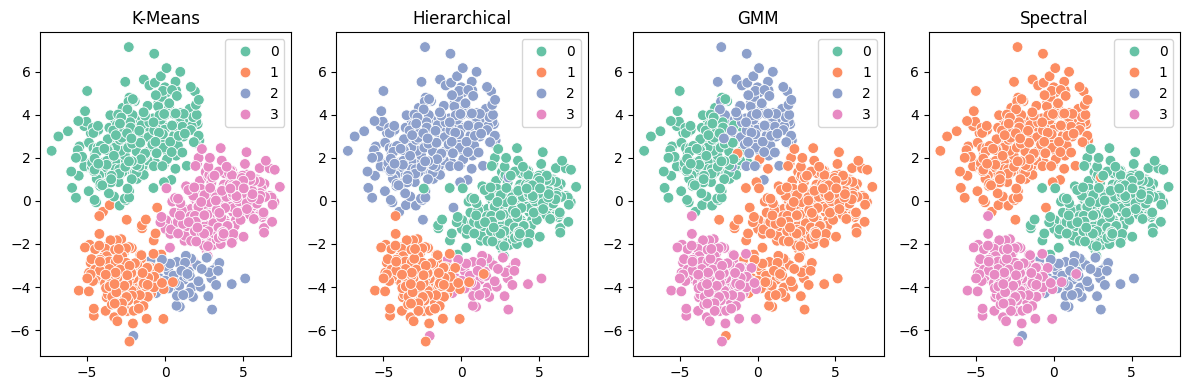

In [ ]:
# visualization
cluster_results = {
    'K-Means': kmeans_result,
    'Hierarchical': hierarchical_result,
    'GMM': gmm_result,
    'Spectral': spectral_result
}

plt.figure(figsize=(12, 4))
for i, (name, labels) in enumerate(cluster_results.items(), 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(x=X_reduction[:, 0], y=X_reduction[:, 1], hue=labels, palette='Set2', s=60)
    plt.title(name)
plt.tight_layout()
plt.show()


In [ ]:
# clustering accuracy
from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.optimize import linear_sum_assignment
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
def match_labels(true, pred):
    cost_matrix = -np.array([[np.sum((true == i) & (pred == j))
                              for j in np.unique(pred)]
                             for i in np.unique(true)])
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    mapping = {j: i for i, j in zip(row_ind, col_ind)}
    return np.array([mapping[c] for c in pred])

In [ ]:
authors_labels = authors_full['Unnamed: 0']
encoder = OrdinalEncoder()
author_encoded = encoder.fit_transform(authors_labels.values.reshape(-1, 1))
author_encoded = author_encoded.flatten()

In [ ]:
kmeans_pair = match_labels(authors_labels, kmeans_result)
hierarchical_pair = match_labels(authors_labels, hierarchical_result)
gmm_pair = match_labels(authors_labels, gmm_result)
spectral_pair = match_labels(authors_labels, spectral_result)

pair_results = {
    'K-Means': kmeans_pair,
    'Hierarchical': hierarchical_pair,
    'GMM': gmm_pair,
    'Spectral': spectral_pair
}

NameError: name 'kmeans_result' is not defined

In [ ]:
for name, pred in pair_results.items():
    acc = accuracy_score(author_encoded, pred)
    print(f"{name}: Accuracy = {acc:.3f}")


K-Means: Accuracy = 0.982
Hierarchical: Accuracy = 0.996
GMM: Accuracy = 0.785
Spectral: Accuracy = 0.995


part c

In [ ]:

df = pd.DataFrame(authors)
df['cluster'] = hierarchical_result
df.head()

cluster_means = df.groupby('cluster').mean()

for i in range(4):
    print("Cluster", i)
    top_words = cluster_means.loc[i].sort_values(ascending=False).head(10)
    print(top_words)


Cluster 0
the     110.522184
and      62.969283
of       50.389078
to       37.624573
a        35.023891
was      33.764505
in.      29.238908
it       21.464164
that     21.368601
his      17.481229
Name: 0, dtype: float64
Cluster 1
the     55.543353
and     51.705202
of      35.213873
to      35.144509
a       27.982659
my      23.184971
in.     20.982659
that    20.352601
is      18.364162
not     16.751445
Name: 1, dtype: float64
Cluster 2
the    61.296875
to     55.818750
and    51.846875
of     49.246875
a      31.221875
her    30.218750
was    25.553125
in.    25.459375
it     23.634375
not    20.603125
Name: 2, dtype: float64
Cluster 3
and     72.890909
the     62.781818
to      48.018182
of      44.181818
in.     28.709091
his     24.472727
with    23.745455
or      15.854545
that    14.836364
all     14.781818
Name: 3, dtype: float64


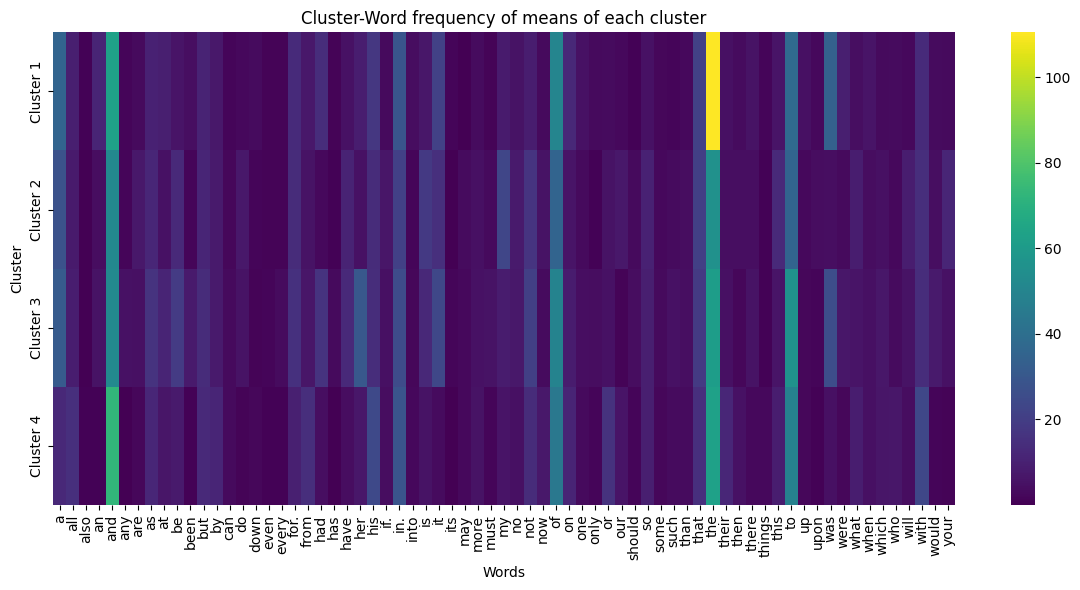

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, cmap="viridis", xticklabels=cluster_means.columns, yticklabels=[f"Cluster {i+1}" for i in range(cluster_means.shape[0])])
plt.title("Cluster-Word frequency of means of each cluster")
plt.xlabel("Words")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

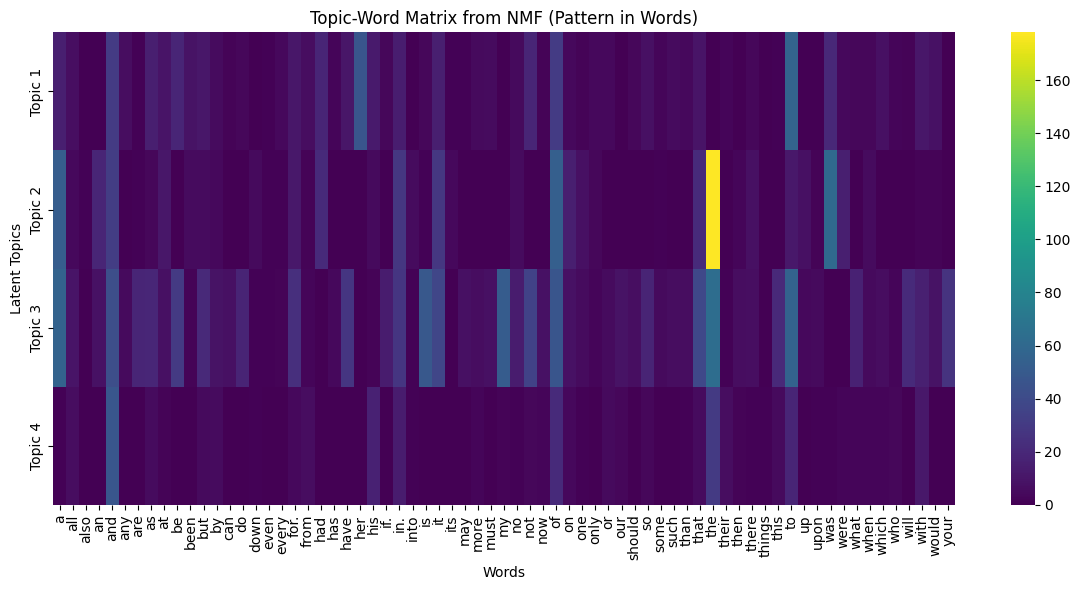


Topic 1: Top 10 words:
to, her, and, of, was, be, had, not, as, it

Topic 2: Top 10 words:
the, was, of, a, and, in., it, had, that, an

Topic 3: Top 10 words:
the, a, to, my, is, of, and, that, it, not

Topic 4: Top 10 words:
and, the, of, to, his, in., with, from, all, their


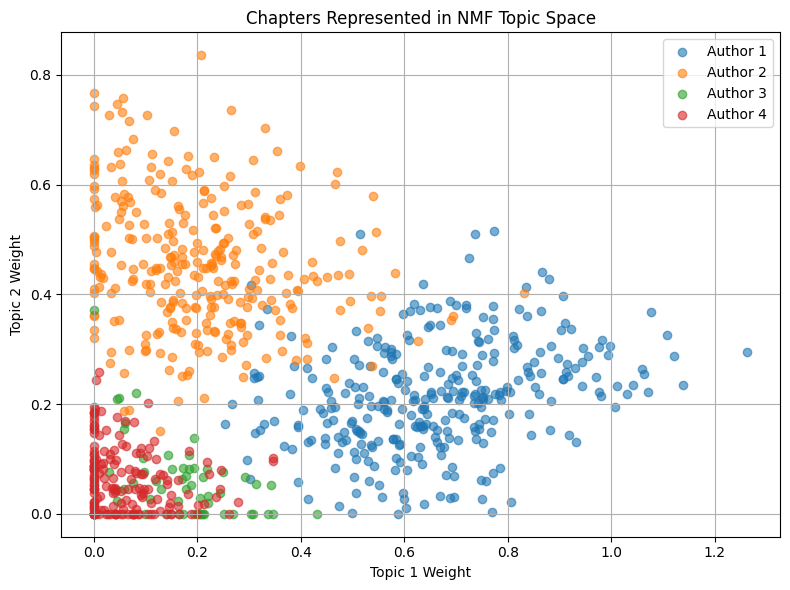

In [ ]:
nmf_model = NMF(n_components=4, random_state=42)
W = nmf_model.fit_transform(authors)
H = nmf_model.components_


plt.figure(figsize=(12, 6))
sns.heatmap(H, cmap="viridis", xticklabels=authors.columns, yticklabels=[f"Topic {i+1}" for i in range(H.shape[0])])
plt.title("Topic-Word Matrix from NMF (Pattern in Words)")
plt.xlabel("Words")
plt.ylabel("Latent Topics")
plt.tight_layout()
plt.show()

# Step 3: Inspect top words per topic
top_n = 10
for topic_idx, topic in enumerate(H):
    top_features_idx = topic.argsort()[::-1][:top_n]
    top_features = [authors.columns[i] for i in top_features_idx]
    print(f"\nTopic {topic_idx + 1}: Top {top_n} words:")
    print(", ".join(top_features))

# Step 4: Visualize chapters in topic space
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.scatter(W[author_encoded == i, 0], W[author_encoded == i, 1], label=f'Author {i+1}', alpha=0.6)
plt.title("Chapters Represented in NMF Topic Space")
plt.xlabel("Topic 1 Weight")
plt.ylabel("Topic 2 Weight")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

part d

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
#Silhouette Scores
silhouette_scores={'kmean':[], 'hc':[], 'gm':[], 'sc':[]}

K = 10
for i in range(2,K+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels_km = kmeans.fit_predict(df.to_numpy())
    hc = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels_hc = hc.fit_predict(df.to_numpy())
    gm = GaussianMixture(n_components=i, covariance_type='spherical', init_params='kmeans', verbose=1, random_state=42)
    cluster_labels_gm = gm.fit_predict(df.to_numpy())
    sc = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
    cluster_labels_sc = sc.fit_predict(df.to_numpy())

    silhouette_scores['kmean'].append(silhouette_score(X, cluster_labels_km))
    silhouette_scores['hc'].append(silhouette_score(X, cluster_labels_hc))
    silhouette_scores['gm'].append(silhouette_score(X, cluster_labels_gm))
    silhouette_scores['sc'].append(silhouette_score(X, cluster_labels_sc))



Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged.
Initialization 0
  Iteration 10
Initialization converged.
Initialization 0
  Iteration 10
Initialization converged.
Initialization 0
  Iteration 10
Initialization converged.


array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

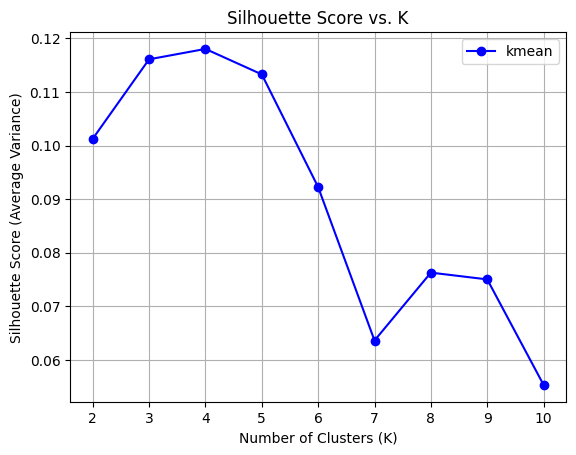

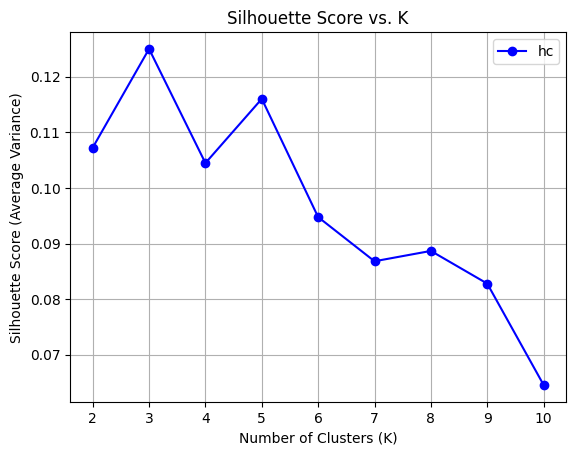

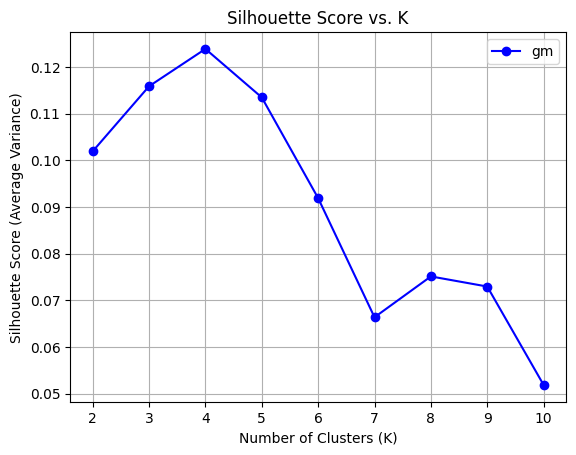

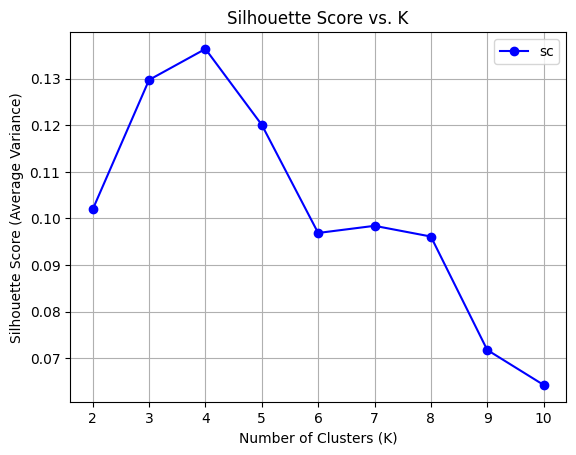

In [ ]:
# Plot silhouette scores
for name, score in silhouette_scores.items():
    plt.plot(np.linspace(2,10,num=9), score, marker='o', linestyle='-', color='b', label=name)
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Silhouette Score (Average Variance)")
    plt.title("Silhouette Score vs. K")
    plt.legend()
    plt.grid()
    plt.show()

Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initializat

NameError: name 'stability_scores' is not defined

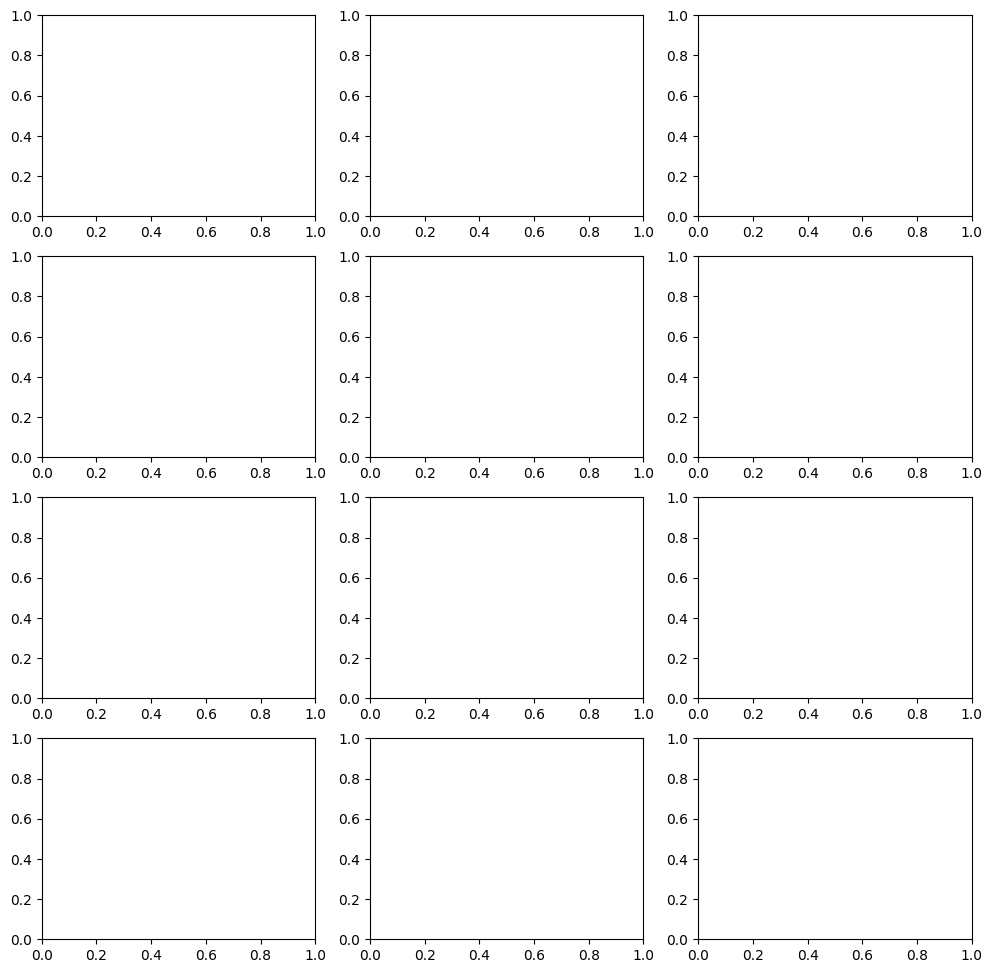

<Figure size 800x500 with 0 Axes>

In [ ]:
# Parameters
rng = np.random.default_rng(42)
iterations = 100
K_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Different K values
stability_scores_km = []  # Store stability scores for each K
stability_scores_hc = []
stability_scores_gm = []
stability_scores_sc = []

fig, axes = plt.subplots(4, 3, figsize=(12, 12))  # 2x2 grid for consensus matrices
axes = axes.flatten()  # Flatten for easy iteration

for idx, K in enumerate(K_values):
    n_samples = authors.shape[0]
    consensus_matrix_km = np.zeros((n_samples, n_samples))
    consensus_matrix_hc = np.zeros((n_samples, n_samples))
    consensus_matrix_gm = np.zeros((n_samples, n_samples))
    consensus_matrix_sc = np.zeros((n_samples, n_samples))

    sampled_matrix = np.zeros((n_samples, n_samples))

    sample_names = authors.index.to_numpy()

    # Bootstrap clustering
    for n in range(iterations):
        train_idx = rng.choice(n_samples, size=int(0.7 * n_samples), replace=False)
        X_train = authors.iloc[train_idx].to_numpy()

        # Run k-means on the training data
        km = KMeans(n_clusters=K, random_state=n, n_init=10)
        km_cluster_labels = km.fit_predict(X_train)
        # hierarchical
        hc = AgglomerativeClustering(n_clusters=K, linkage='ward')
        hc_cluster_labels = hc.fit_predict(X_train)
        # gmm
        gm = GaussianMixture(n_components=K, covariance_type='spherical', init_params='kmeans', verbose=1, random_state=n)
        gm_cluster_labels = gm.fit_predict(X_train)
        # spectral clustering
        sc = SpectralClustering(n_clusters=K, affinity='nearest_neighbors', n_neighbors=10, random_state=n)
        sc_cluster_labels = sc.fit_predict(X_train)


        # Update sampled matrix
        sampled_matrix[np.ix_(train_idx, train_idx)] += 1

        # Create co-membership matrix for this iteration
        co_members_km = np.equal.outer(km_cluster_labels, km_cluster_labels)
        co_members_hc = np.equal.outer(hc_cluster_labels, hc_cluster_labels)
        co_members_gm = np.equal.outer(gm_cluster_labels, gm_cluster_labels)
        co_members_sc = np.equal.outer(sc_cluster_labels, sc_cluster_labels)

        # Update consensus matrix for sampled indices
        consensus_matrix_km[np.ix_(train_idx, train_idx)] += co_members_km
        consensus_matrix_hc[np.ix_(train_idx, train_idx)] += co_members_hc
        consensus_matrix_gm[np.ix_(train_idx, train_idx)] += co_members_gm
        consensus_matrix_sc[np.ix_(train_idx, train_idx)] += co_members_sc

    # Normalize consensus matrix
    with np.errstate(divide='ignore', invalid='ignore'):
        consensus_matrix_km = np.divide(consensus_matrix_km, sampled_matrix, where=(sampled_matrix != 0))
        consensus_matrix_hc = np.divide(consensus_matrix_hc, sampled_matrix, where=(sampled_matrix != 0))
        consensus_matrix_gm = np.divide(consensus_matrix_gm, sampled_matrix, where=(sampled_matrix != 0))
        consensus_matrix_sc = np.divide(consensus_matrix_sc, sampled_matrix, where=(sampled_matrix != 0))
        consensus_matrix_km = np.nan_to_num(consensus_matrix_km)  # Replace NaN with 0
        consensus_matrix_hc = np.nan_to_num(consensus_matrix_hc)  # Replace NaN with 0
        consensus_matrix_gm = np.nan_to_num(consensus_matrix_gm)  # Replace NaN with 0
        consensus_matrix_sc = np.nan_to_num(consensus_matrix_sc)  # Replace NaN with 0

    # Final KMeans clustering on full dataset
    final_km = KMeans(n_clusters=K, random_state=42, n_init=10)
    final_clusters_km = final_km.fit_predict(authors.to_numpy())
    final_hc = AgglomerativeClustering(n_clusters=K, linkage='ward')
    final_clusters_hc = final_hc.fit_predict(authors.to_numpy())
    final_gm = GaussianMixture(n_components=K, covariance_type='spherical', init_params='kmeans', verbose=1, random_state=42)
    final_clusters_gm = final_gm.fit_predict(authors.to_numpy())
    final_sc = SpectralClustering(n_clusters=K, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
    final_clusters_sc = final_sc.fit_predict(authors.to_numpy())

    # Sort consensus matrix for visualization
    order_idx_km = np.argsort(final_clusters_km)
    order_idx_hc = np.argsort(final_clusters_hc)
    order_idx_gm = np.argsort(final_clusters_gm)
    order_idx_sc = np.argsort(final_clusters_sc)
    consensus_matrix_km = consensus_matrix_km[order_idx_km][:, order_idx_km]
    consensus_matrix_hc = consensus_matrix_hc[order_idx_hc][:, order_idx_hc]
    consensus_matrix_gm = consensus_matrix_gm[order_idx_gm][:, order_idx_gm]
    consensus_matrix_sc = consensus_matrix_sc[order_idx_sc][:, order_idx_sc]

    # Compute stability score (variance of off-diagonal consensus scores)
    stability_score_km = 0
    stability_score_hc = 0
    stability_score_gm = 0
    stability_score_sc = 0
    n_pairs = 0

    for i in range(n_samples):
        for j in range(i + 1, n_samples):  # Only consider off-diagonal elements
            stability_score_km += consensus_matrix_km[i, j] * (1 - consensus_matrix_km[i, j])
            stability_score_hc += consensus_matrix_hc[i, j] * (1 - consensus_matrix_hc[i, j])
            stability_score_gm += consensus_matrix_gm[i, j] * (1 - consensus_matrix_gm[i, j])
            stability_score_sc += consensus_matrix_sc[i, j] * (1 - consensus_matrix_sc[i, j])
            n_pairs += 1

    stability_score_km /= n_pairs  # Normalize by number of pairs
    stability_score_hc /= n_pairs
    stability_score_gm /= n_pairs
    stability_score_sc /= n_pairs

    # Store stability scores
    stability_scores_km.append(stability_score_km)
    stability_scores_hc.append(stability_score_hc)
    stability_scores_gm.append(stability_score_gm)
    stability_scores_sc.append(stability_score_sc)

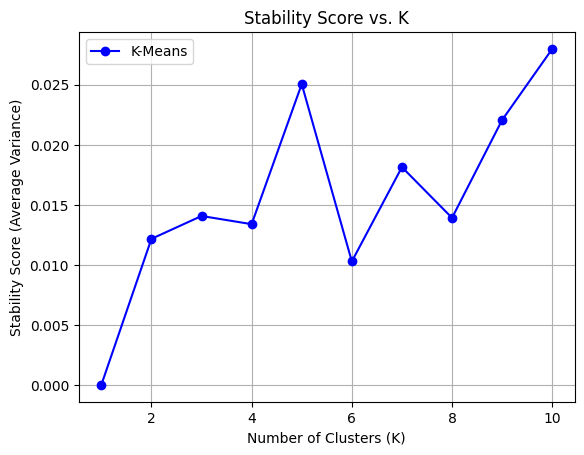

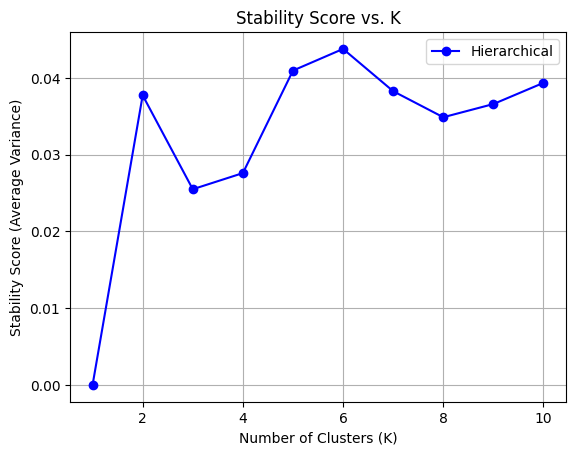

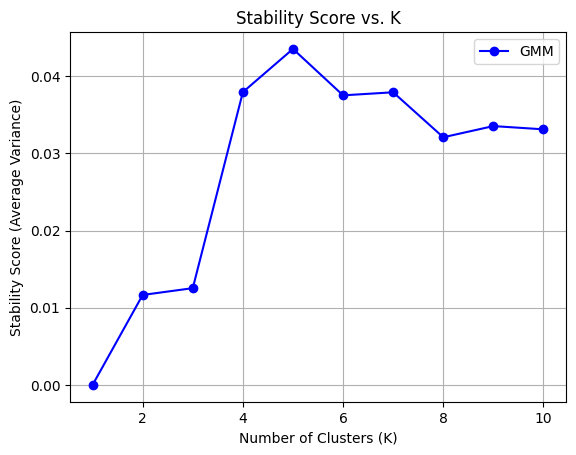

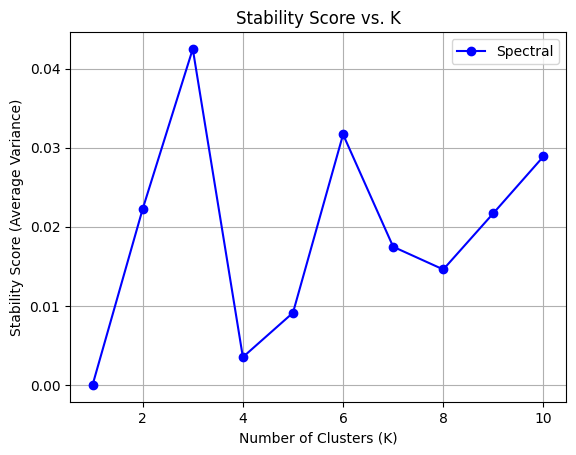

In [ ]:
dict_stability = {
    'K-Means': stability_scores_km,
    'Hierarchical': stability_scores_hc,
    'GMM': stability_scores_gm,
    'Spectral': stability_scores_sc
}

for stability_name, stability_score in dict_stability.items():
    plt.plot(K_values, stability_score, marker='o', linestyle='-', color='b', label=stability_name)
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Stability Score (Average Variance)")
    plt.title("Stability Score vs. K")
    plt.legend()
    plt.grid()
    plt.show()

Problem 2 part b: GMM

In [ ]:
from scipy.stats import multivariate_normal

In [ ]:
def compute_gmm(X, K, max_iters=100, tol=1e-3):
  np.random.seed(0)
  n, d = X.shape
  # randomly choose initial mean
  mu = X[np.random.choice(n, K, replace=False)]
  # initialize covariance matrix
  cov = [np.cov(X, rowvar=False) for k in range(K)]
  # initialize pi
  pi = np.ones(K) / K

  log_likelihood_old = 0

  for iter in range(max_iters):
        # E-step:
        gamma = np.zeros((n, K))
        for k in range(K):
            rv = multivariate_normal(mean=mu[k], cov=cov[k], allow_singular=True)
            gamma[:, k] = pi[k] * rv.pdf(X)

        gamma = gamma / gamma.sum(axis=1, keepdims=True)

        # M-step:
        Nk = gamma.sum(axis=0)
        pi = Nk / n

        mu = (gamma.T @ X) / Nk[:, np.newaxis]

        cov = []
        for k in range(K):
            diff = X - mu[k]
            weighted = gamma[:, k][:, np.newaxis] * diff
            cov_k = (weighted.T @ diff) / Nk[k]
            cov.append(cov_k + 1e-6 * np.eye(d))  # add small reg


        # Compute log-likelihood
        log_likelihood = 0
        for k in range(K):
            rv = multivariate_normal(mean=mu[k], cov=cov[k], allow_singular=True)
            log_likelihood += np.sum(np.log(pi[k] * rv.pdf(X) + 1e-10))

        # Convergence check
        if np.abs(log_likelihood - log_likelihood_old) < tol:
            break
        log_likelihood_old = log_likelihood


  return {
        "means": mu,
        "covariances": cov,
        "weights": pi,
        "responsibilities": gamma,
        "log_likelihood": log_likelihood
    }

In [ ]:
def predict_gmm(X, pi, mu, cov):
    n = X.shape[0]
    K = len(pi)

    gamma = np.zeros((n, K))
    for k in range(K):
        gamma[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=cov[k])

    gamma /= np.sum(gamma, axis=1, keepdims=True)

    cluster_labels = np.argmax(gamma, axis=1)

    return cluster_labels, gamma

In [ ]:
# compare self built GMM and python built-in:
self_GMM = compute_gmm(X_reduction, 4)
self_labels, self_gamma = predict_gmm(X_reduction, self_GMM['weights'], self_GMM['means'], self_GMM['covariances'])

built_in_GMM = GaussianMixture(n_components=4, covariance_type='full', init_params='kmeans', verbose=1, random_state=0)
built_in_labels = built_in_GMM.fit_predict(X_reduction)

Initialization 0
Initialization converged.


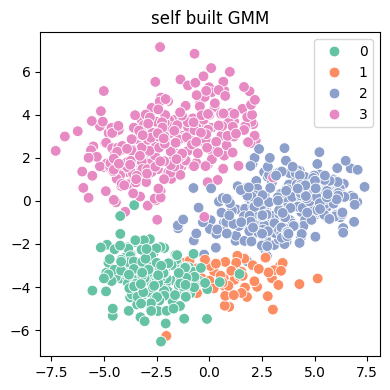

In [ ]:
# draw picture
plt.figure(figsize=(4, 4))
sns.scatterplot(x=X_reduction[:, 0], y=X_reduction[:, 1], hue=built_in_labels, palette='Set2', s=60)
plt.title('self built GMM')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'built-in GMM')

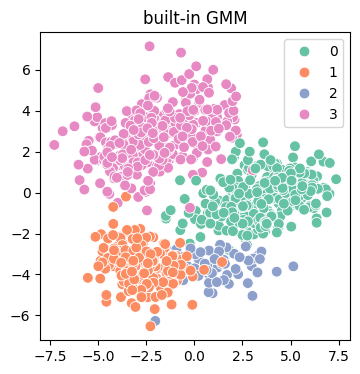

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x=X_reduction[:, 0], y=X_reduction[:, 1], hue=self_labels, palette='Set2', s=60)
plt.title('built-in GMM')

In [ ]:
pair_result = match_labels(self_labels, built_in_labels)
print('the accuracy between self-built GMM and built-in GMM is:', accuracy_score(self_labels, pair_result))

the accuracy between self-built GMM and built-in GMM is: 1.0
